In [2]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
import time
from collections import defaultdict as ddict

# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline 

In [14]:
# bring in dataframe from csv file created at the end of Project_1_data_cleaning script
#using the combined stations and lines data to test theory. Combined = final_data.csv, uncombined = clean_data.csv

data = pd.read_csv('merg_data.csv')

In [16]:
data['turnstileid'] = data['C/A']+data['UNIT']+data['SCP']+data['STATION']

In [36]:
s2 =data.sort_values('TIME').groupby('turnstileid').ENTRIES.diff()

In [37]:
data['net_entries'] = s2

In [39]:
s3 =data.sort_values('TIME').groupby('turnstileid').EXITS.diff()

In [40]:
data['net_exits']= s3

In [43]:
data['net']=abs(data['net_entries']+data['net_exits'])

In [44]:
data

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstileid,net,net_entries,net_exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,03:00:00,RECOVR AUD,6527780,2210496,A002R05102-00-0059 ST,94318.0,-69550.0,-24768.0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,07:00:00,REGULAR,6527794,2210507,A002R05102-00-0059 ST,5322.0,-3995.0,-1327.0
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,11:00:00,REGULAR,6527838,2210585,A002R05102-00-0059 ST,169538.0,-124991.0,-44547.0
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,15:00:00,REGULAR,6527994,2210644,A002R05102-00-0059 ST,791.0,-597.0,-194.0
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,19:00:00,REGULAR,6528278,2210705,A002R05102-00-0059 ST,6197.0,-4614.0,-1583.0
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/24/2018,23:00:00,REGULAR,6528389,2210728,A002R05102-00-0059 ST,4435.0,-3365.0,-1070.0
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2018,03:00:00,REGULAR,6528417,2210734,A002R05102-00-0059 ST,2455.0,-1892.0,-563.0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2018,07:00:00,REGULAR,6528423,2210741,A002R05102-00-0059 ST,863.0,629.0,234.0
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2018,11:00:00,REGULAR,6528468,2210788,A002R05102-00-0059 ST,935.0,-585.0,-350.0
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/25/2018,15:00:00,REGULAR,6528591,2210838,A002R05102-00-0059 ST,1041.0,-677.0,-364.0


### MVP plots

In [45]:
#Converting the 8 pm to midnight data to the previous day.

data['TIME'] = pd.to_timedelta(data['TIME'], unit='h')

In [50]:
data['DATE']=pd.to_datetime(data['DATE'])
data['day_of_week'] = data['DATE'].dt.weekday_name

KeyboardInterrupt: 

In [46]:
data.dtypes

C/A                     object
UNIT                    object
SCP                     object
STATION                 object
LINENAME                object
DIVISION                object
DATE                    object
TIME           timedelta64[ns]
DESC                    object
ENTRIES                  int64
EXITS                    int64
turnstileid             object
net                    float64
net_entries            float64
net_exits              float64
dtype: object

In [47]:
def subtractOneDay(day):
    if day == 'Saturday': new_day = 'Friday'
    elif day == 'Friday': new_day = 'Thursday'
    elif day == 'Thursday': new_day = 'Wednesday'
    elif day == 'Wednesday': new_day = 'Tuesday'
    elif day == 'Tuesday': new_day = 'Monday'
    elif day == 'Monday': new_day = 'Sunday'
    elif day == 'Sunday': new_day = 'Saturday'
    return new_day

In [48]:
data['new_day'] = data.day_of_week[data['TIME'] == '00:00:00'].apply(subtractOneDay)
data['new_day'] = data['new_day'].fillna(data['day_of_week'])

AttributeError: 'DataFrame' object has no attribute 'day_of_week'

In [9]:
#Converting times to categories during the day

In [10]:
def convertTimeToCategory(time):
    hour = time.hour
    if hour > 20 or hour == 0:
        category = 'Night'
    elif hour > 16:
        category = 'Evening'
    elif hour > 12:
        category = 'Afternoon'
    elif hour > 8:
        category = 'Morning'
    elif hour > 4:
        category = 'Early Risers'
    elif hour > 0:
        category = 'Late Night'
    
    return category

In [11]:
data.rename(index=str, columns={"sum_ent_ext": "Traffic"}, inplace = True)
data['TIME_2'] = pd.to_datetime(data['TIME']).dt.round('H')
data['Category'] = data['TIME_2'].apply(convertTimeToCategory)
data.drop(columns=['TIME_2'], inplace = True)

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3296: FutureWarning: Passing timedelta64-dtype data is deprecated, will raise a TypeError in a future version
  exec(code_obj, self.user_global_ns, self.user_ns)


##### By station

<Figure size 1440x720 with 0 Axes>

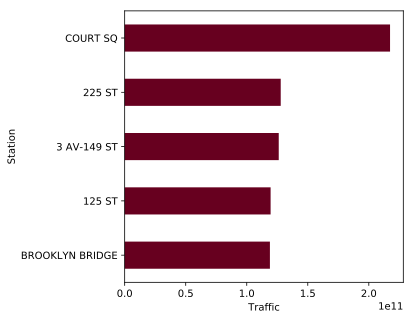

In [51]:
# compute total traffic (entries + exits, 'sum_ent_ext' column) per station for the entire data period and order from greatest to least
# set as new dataframe and limit to top 10
# plot as bar graph
fig = plt.figure(figsize=(20,10))
by_station = data.groupby('STATION').sum().sort_values(by=['net'], ascending=True)
traffic_by_station = pd.DataFrame(by_station)
by_station_top_five = traffic_by_station.tail(5)
by_station_top_five.plot.barh(y='net', figsize = [5,5], colormap = 'PuRd_r', legend=None)
plt.ylabel('Station')
plt.xlabel('Traffic')
plt.rcParams["savefig.bbox"] = "tight"
plt.savefig('traffic_by_station.png')

##### By day of week

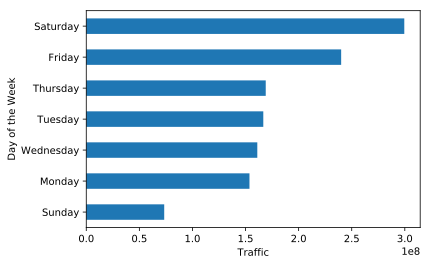

In [36]:
# compute total traffic per day of week for the entire data period and order from greatest to least
# set as new dataframe
# plot as bar graph

by_dow = data.groupby('new_day').sum().sort_values(by=['Traffic'], ascending = True)
by_dow = pd.DataFrame(by_dow)
by_dow.plot.barh(y='Traffic', legend=None);
plt.ylabel('Day of the Week')
plt.xlabel('Traffic')
plt.rcParams["savefig.bbox"] = "tight"
plt.savefig('traffic_by_day_of_week.png')

##### By time of day (delete this?)

Text(0.5, 0, 'Traffic')

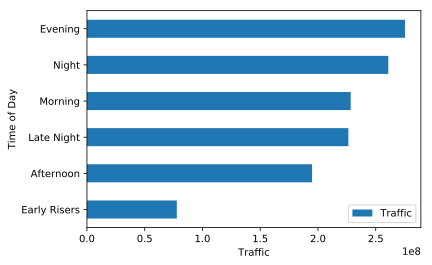

In [24]:
#by time of day (?)
# delete this? not very telling... 

by_time_of_day = data.groupby(['Category']).sum().sort_values(by=['Traffic'], ascending = True)
by_time_of_day = pd.DataFrame(by_time_of_day)
by_time_of_day.plot.barh(y='Traffic');
plt.ylabel('Time of Day')
plt.xlabel('Traffic')

#### Figuring out weekly schedule - exploratory code ended up not being used

In [168]:
# weekly schedule (from Natasha)


#data.groupby('STATION').sum().sort_values(by=['Traffic'],ascending=False)

#weekly_schedule = (data.groupby(['new_day','STATION']).sum().reset_index())

#weekly_all = pd.DataFrame(weekly_schedule)

#by_day = weekly_all.set_index('new_day')

##### Time series analysis attempt

In [ ]:
# Create a time series plot of traffic each day of the week
# x-axis = day of the week (Monday through Sunday)
# y-axis = SUM() or MEDIAN() of traffic
# each line represents one of the top 10 stations



In [167]:
# sort by station, unit, scp, and date in order to organize dates in chronological order per station

#by_station = data.sort_values(by = ['STATION', 'UNIT', 'SCP', 'DATE'])
# by_station = clean_merge.groupby('STATION').sum().sort_values(by=['sum_ent_ext'], ascending=True)
#by_station.head(5)

### Analysis for individual stations

In [166]:
by_station_top_ten = traffic_by_station.tail(10)
by_station_top_ten

,ENTRIES,EXITS,month,Ent,Ext,Traffic
STATION,,,,,,
CANAL ST,2808858430312,2790642843951,156239,11436007.0,7104319.0,18540326.0
14 ST-UNION SQ,528980327019,194771535025,103813,10274841.0,9015538.0,19290379.0
GROVE STREET,3871181366,4117202464,51444,13382600.0,6655126.0,20037726.0
34 ST-HERALD SQ,1103225481555,1003464570751,139267,10566635.0,9784775.0,20351410.0
FULTON ST,2826124178753,2799517212355,262982,11901915.0,8580725.0,20482640.0
JOURNAL SQUARE,5628983205,4814775009,56766,15445480.0,6035892.0,21481372.0
TIMES SQ-42 ST,2582810663071,2045785402246,134236,11406867.0,10630194.0,22037061.0
PATH NEW WTC,4099852115,4175049892,117477,11168357.0,13464002.0,24632359.0
GRD CNTRL-42 ST,682153871487,656069441658,175668,13589407.0,12347708.0,25937115.0


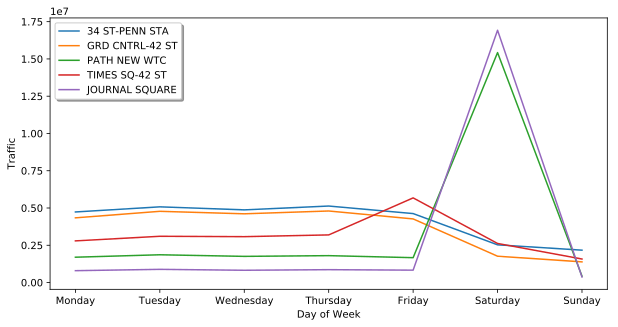

<Figure size 432x288 with 0 Axes>

In [43]:
# line chart of total traffic per day for top stations
fig = plt.figure(figsize=(10, 5))
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

by_station = data.groupby(['STATION', 'new_day']).sum()
penn = by_station.loc['34 ST-PENN STA'].reindex(ordered_days)
gct = by_station.loc['GRD CNTRL-42 ST'].reindex(ordered_days)
wtc = by_station.loc['PATH NEW WTC'].reindex(ordered_days)
tsq = by_station.loc['TIMES SQ-42 ST'].reindex(ordered_days)
jsq = by_station.loc['JOURNAL SQUARE'].reindex(ordered_days)
fulton = by_station.loc['FULTON ST'].reindex(ordered_days)
herald = by_station.loc['34 ST-HERALD SQ'].reindex(ordered_days)
grove = by_station.loc['GROVE STREET'].reindex(ordered_days)
union = by_station.loc['14 ST-UNION SQ'].reindex(ordered_days)
canal = by_station.loc['CANAL ST'].reindex(ordered_days)

# penn.plot(y='Traffic')
# gct.plot(y='Traffic')

plt.plot(penn.loc[:, 'Traffic'])
plt.plot(gct.loc[:, 'Traffic'])
plt.plot(wtc.loc[:, 'Traffic'])
plt.plot(tsq.loc[:, 'Traffic'])
plt.plot(jsq.loc[:, 'Traffic'])
# plt.plot(fulton.loc[:, 'Traffic'])
# plt.plot(herald.loc[:, 'Traffic'])
# plt.plot(grove.loc[:, 'Traffic'])
# plt.plot(union.loc[:, 'Traffic'])
# plt.plot(canal.loc[:, 'Traffic'])

plt.legend(['34 ST-PENN STA','GRD CNTRL-42 ST','PATH NEW WTC','TIMES SQ-42 ST','JOURNAL SQUARE'],
           shadow = True, loc = 0);
plt.xlabel('Day of Week')
plt.ylabel('Traffic')
plt.show()

#plt.rcParams["savefig.bbox"] = "tight"
plt.savefig('station_by_day_of_week.png', bbox_inches = 'tight')

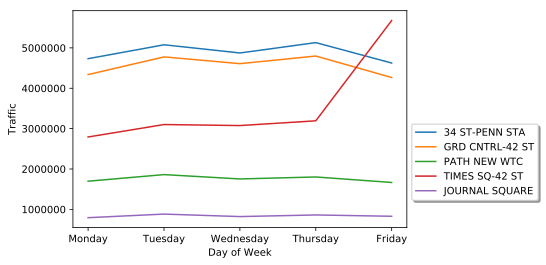

<Figure size 432x288 with 0 Axes>

In [44]:
#Traffic Patterns during the week

ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

by_station = data.groupby(['STATION', 'new_day']).sum()
penn = by_station.loc['34 ST-PENN STA'].reindex(ordered_days)
gct = by_station.loc['GRD CNTRL-42 ST'].reindex(ordered_days)
wtc = by_station.loc['PATH NEW WTC'].reindex(ordered_days)
tsq = by_station.loc['TIMES SQ-42 ST'].reindex(ordered_days)
jsq = by_station.loc['JOURNAL SQUARE'].reindex(ordered_days)
fulton = by_station.loc['FULTON ST'].reindex(ordered_days)
herald = by_station.loc['34 ST-HERALD SQ'].reindex(ordered_days)
grove = by_station.loc['GROVE STREET'].reindex(ordered_days)
union = by_station.loc['14 ST-UNION SQ'].reindex(ordered_days)
canal = by_station.loc['CANAL ST'].reindex(ordered_days)

# penn.plot(y='Traffic')
# gct.plot(y='Traffic')

plt.plot(penn.loc[:, 'Traffic'])
plt.plot(gct.loc[:, 'Traffic'])
plt.plot(wtc.loc[:, 'Traffic'])
plt.plot(tsq.loc[:, 'Traffic'])
plt.plot(jsq.loc[:, 'Traffic'])
# plt.plot(fulton.loc[:, 'Traffic'])
# plt.plot(herald.loc[:, 'Traffic'])
# plt.plot(grove.loc[:, 'Traffic'])
# plt.plot(union.loc[:, 'Traffic'])
# plt.plot(canal.loc[:, 'Traffic'])

plt.legend(['34 ST-PENN STA','GRD CNTRL-42 ST','PATH NEW WTC','TIMES SQ-42 ST','JOURNAL SQUARE'],
           shadow = True, loc = 0, bbox_to_anchor=(1.0, 0.5));
plt.xlabel('Day of Week')
plt.ylabel('Traffic')
plt.show()
plt.rcParams["savefig.bbox"] = "tight"
plt.savefig('station_week_day.png')

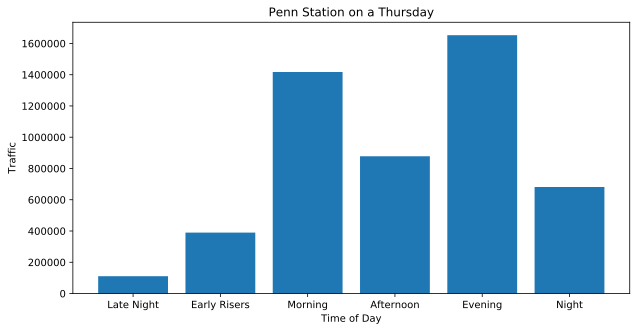

In [52]:
# Penn on Thursdays
fig = plt.figure(figsize=(10, 5))
ordered_times_1 = ['Late Night','Early Risers', 'Morning', 'Afternoon', 'Evening', 'Night']
# ordered_times_2 = ['03:00:00', '07:00:00', '11:00:00', '15:00:00', '19:00:00', '23:00:00']

gct = data.loc[data['STATION'] == '34 ST-PENN STA'].loc[data['new_day'] == 'Thursday']
gct1 = gct.groupby('Category').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_1)

# gct2 = gct.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_2)
plt.bar(ordered_times_1, gct1.loc[:, 'Traffic']);
plt.xlabel('Time of Day')
plt.ylabel('Traffic')
plt.title('Penn Station on a Thursday')
plt.rcParams["savefig.bbox"] = "tight"
plt.savefig('penn_week_day.png')

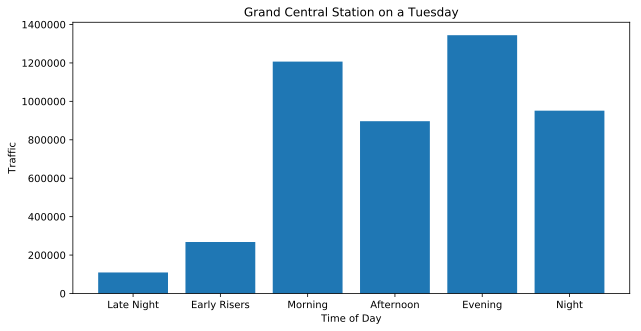

In [53]:
# Grand Central on Thursdays
fig = plt.figure(figsize=(10, 5))
ordered_times_1 = ['Late Night','Early Risers', 'Morning', 'Afternoon', 'Evening', 'Night']
# ordered_times_2 = ['03:00:00', '07:00:00', '11:00:00', '15:00:00', '19:00:00', '23:00:00']

gct = data.loc[data['STATION'] == 'GRD CNTRL-42 ST'].loc[data['new_day'] == 'Tuesday']
gct1 = gct.groupby('Category').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_1)

# gct2 = gct.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_2)
plt.bar(ordered_times_1, gct1.loc[:, 'Traffic']);
plt.xlabel('Time of Day')
plt.ylabel('Traffic')
plt.title('Grand Central Station on a Tuesday')
plt.rcParams["savefig.bbox"] = "tight"
plt.savefig('grand_week_day.png')

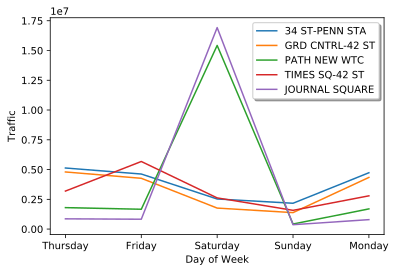

<Figure size 432x288 with 0 Axes>

In [54]:
#Traffic Patterns during the weekend

ordered_days = ["Thursday","Friday", "Saturday", "Sunday", "Monday"]

by_station = data.groupby(['STATION', 'new_day']).sum()
penn = by_station.loc['34 ST-PENN STA'].reindex(ordered_days)
gct = by_station.loc['GRD CNTRL-42 ST'].reindex(ordered_days)
wtc = by_station.loc['PATH NEW WTC'].reindex(ordered_days)
tsq = by_station.loc['TIMES SQ-42 ST'].reindex(ordered_days)
jsq = by_station.loc['JOURNAL SQUARE'].reindex(ordered_days)
fulton = by_station.loc['FULTON ST'].reindex(ordered_days)
herald = by_station.loc['34 ST-HERALD SQ'].reindex(ordered_days)
grove = by_station.loc['GROVE STREET'].reindex(ordered_days)
union = by_station.loc['14 ST-UNION SQ'].reindex(ordered_days)
canal = by_station.loc['CANAL ST'].reindex(ordered_days)

# penn.plot(y='Traffic')
# gct.plot(y='Traffic')

plt.plot(penn.loc[:, 'Traffic'])
plt.plot(gct.loc[:, 'Traffic'])
plt.plot(wtc.loc[:, 'Traffic'])
plt.plot(tsq.loc[:, 'Traffic'])
plt.plot(jsq.loc[:, 'Traffic'])
# plt.plot(fulton.loc[:, 'Traffic'])
# plt.plot(herald.loc[:, 'Traffic'])
# plt.plot(grove.loc[:, 'Traffic'])
# plt.plot(union.loc[:, 'Traffic'])
# plt.plot(canal.loc[:, 'Traffic'])

plt.legend(['34 ST-PENN STA','GRD CNTRL-42 ST','PATH NEW WTC','TIMES SQ-42 ST','JOURNAL SQUARE'],
           shadow = True, loc = 0,);
plt.xlabel('Day of Week')
plt.ylabel('Traffic')
plt.show()
plt.rcParams["savefig.bbox"] = "tight"
plt.savefig('weekend_stations.png')

**Some comments for the above code:**
    
- For gct1 line of code -- you can remove ".sort_values(by = ['Traffic'], ascending = False)" from the line and the result will be the same (the same goes for any following code blocks with that line)
- By only using those "ordered_times", we are removing a lot of data, and therefore could be masking the true story. 

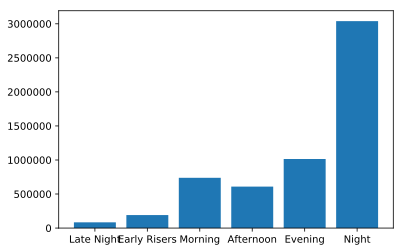

In [152]:
# Times Square on saturdays

tsq = data.loc[data['STATION'] == 'TIMES SQ-42 ST'].loc[data['new_day'] == 'Friday']
tsq = tsq.groupby('Category').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_1)
plt.bar(ordered_times_1, tsq.loc[:, 'Traffic']);

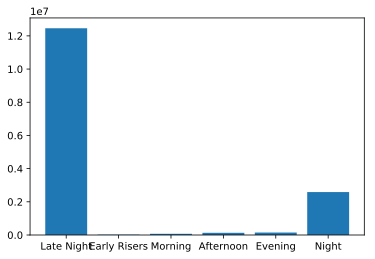

In [154]:
# Journal Square on saturdays - looks like the data would need to be manipulated further

jsq = data.loc[data['STATION'] == 'PATH NEW WTC'].loc[data['new_day'] == 'Saturday']
jsq = jsq.groupby('Category').sum().sort_values(by = ['Traffic'], ascending = False).reindex(ordered_times_1)
plt.bar(ordered_times_1, jsq.loc[:, 'Traffic']);

In [79]:
# World Trade Center on Saturdays

#wtc = data.loc[data['STATION'] == 'PATH NEW WTC'].loc[data['day_of_week'] == 'Saturday']
# wtc['TIME'].dt.round('H')
#wtc['TIME2'] = pd.to_datetime(wtc['TIME'])
#wtc['TIME3'] = wtc['TIME2'].dt.round('H')
#wtc.head(20)
#wtc = wtc.groupby('TIME').sum().sort_values(by = ['Traffic'], ascending = False)
#wtc.head()
#plt.bar(ordered_times_1, wtc.loc[:, 'Traffic'])

In [173]:
jrnlsq = data.loc[(data.STATION == 'JOURNAL SQUARE') & (data.new_day == 'Saturday')]

In [177]:
jrnlsq.sort_values(by='Traffic')

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,month,day_of_week,Ent,Ext,Traffic,Category,new_day
107279,PTH03,R552,00-01-08,JOURNAL SQUARE,1,PTH,2018-02-24,19:06:33,REGULAR,57036,47161,2,Saturday,1.0,2.0,3.0,Evening,Saturday
2384412,PTH03,R552,00-01-07,JOURNAL SQUARE,1,PTH,2018-05-19,05:37:52,REGULAR,178709,35231,5,Saturday,2.0,1.0,3.0,Early Risers,Saturday
1624402,PTH03,R552,00-00-00,JOURNAL SQUARE,1,PTH,2018-04-21,22:55:21,REGULAR,43509,17697,4,Saturday,2.0,1.0,3.0,Night,Saturday
2574589,PTH03,R552,00-01-07,JOURNAL SQUARE,1,PTH,2018-05-26,05:51:52,REGULAR,180054,35478,5,Saturday,2.0,1.0,3.0,Early Risers,Saturday
297773,PTH03,R552,00-01-04,JOURNAL SQUARE,1,PTH,2018-03-03,05:27:00,REGULAR,72461,46376,3,Saturday,0.0,4.0,4.0,Early Risers,Saturday
1814465,PTH03,R552,00-00-00,JOURNAL SQUARE,1,PTH,2018-04-28,06:07:21,REGULAR,45703,18990,4,Saturday,4.0,0.0,4.0,Early Risers,Saturday
2953265,PTH03,R552,00-01-07,JOURNAL SQUARE,1,PTH,2018-06-09,05:51:52,REGULAR,182808,36038,6,Saturday,3.0,1.0,4.0,Early Risers,Saturday
107280,PTH03,R552,00-01-08,JOURNAL SQUARE,1,PTH,2018-02-24,23:18:33,REGULAR,57038,47163,2,Saturday,2.0,2.0,4.0,Night,Saturday
1434755,PTH03,R552,00-02-01,JOURNAL SQUARE,1,PTH,2018-04-14,04:30:06,REGULAR,103,179,4,Saturday,1.0,3.0,4.0,Early Risers,Saturday
2383820,PTH03,R552,00-00-02,JOURNAL SQUARE,1,PTH,2018-05-19,04:39:28,REGULAR,68312,20961,5,Saturday,3.0,1.0,4.0,Early Risers,Saturday


In [182]:
data.head(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,month,day_of_week,Ent,Ext,Traffic,Category,new_day
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,11:00:00,REGULAR,6527838,2210585,2,Saturday,44.0,78.0,122.0,Morning,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,15:00:00,REGULAR,6527994,2210644,2,Saturday,156.0,59.0,215.0,Afternoon,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,19:00:00,REGULAR,6528278,2210705,2,Saturday,284.0,61.0,345.0,Evening,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,23:00:00,REGULAR,6528389,2210728,2,Saturday,111.0,23.0,134.0,Night,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-25,03:00:00,REGULAR,6528417,2210734,2,Sunday,28.0,6.0,34.0,Late Night,Sunday


In [194]:
suspicious = data[(data['Traffic'] > 1000) & (data['TIME']=='00:00:00') & (data['day_of_week'] == 'Saturday')]

In [195]:
suspicious.sample(5)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,month,day_of_week,Ent,Ext,Traffic,Category,new_day
1132594,R629,R065,00-03-01,ROCKAWAY AV,3,IRT,2018-03-31,0 days,REGULAR,225049,373045,3,Saturday,23220.0,106612.0,129832.0,Night,Friday
1699101,R612,R057,01-00-06,ATL AV-BARCLAY,BDNQR2345,IRT,2018-04-21,0 days,REGULAR,1095059,852135,4,Saturday,13289.0,60980.0,74269.0,Night,Friday
861740,N607,R025,01-00-00,JAMAICA CENTER,EJZ,IND,2018-03-24,0 days,REGULAR,124516,103965,3,Saturday,124516.0,102728.0,227244.0,Night,Friday
33715,JFK03,R536,00-00-04,JFK JAMAICA CT1,E,IND,2018-02-24,0 days,REGULAR,505489,382195,2,Saturday,144616.0,94740.0,239356.0,Night,Friday
1511604,R629,R065,00-03-01,ROCKAWAY AV,3,IRT,2018-04-14,0 days,REGULAR,231665,383574,4,Saturday,23993.0,110168.0,134161.0,Night,Friday


In [198]:
def suspicious(num):
    num = data['Traffic']
    if num.diff()>1000:
        return data.index

In [199]:
new_data = data.apply(suspicious)

ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', 'occurred at index C/A')

In [200]:
data.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,month,day_of_week,Ent,Ext,Traffic,Category,new_day
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,11:00:00,REGULAR,6527838,2210585,2,Saturday,44.0,78.0,122.0,Morning,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,15:00:00,REGULAR,6527994,2210644,2,Saturday,156.0,59.0,215.0,Afternoon,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,19:00:00,REGULAR,6528278,2210705,2,Saturday,284.0,61.0,345.0,Evening,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,23:00:00,REGULAR,6528389,2210728,2,Saturday,111.0,23.0,134.0,Night,Saturday
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-25,03:00:00,REGULAR,6528417,2210734,2,Sunday,28.0,6.0,34.0,Late Night,Sunday


In [208]:
data.sort_values(['C/A', 'UNIT', 'STATION', 'LINENAME', 'DIVISION', 'DATE'])

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,month,day_of_week,Ent,Ext,Traffic,Category,new_day
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,11:00:00,REGULAR,6527838,2210585,2,Saturday,44.0,78.0,122.0,Morning,Saturday
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,15:00:00,REGULAR,6527994,2210644,2,Saturday,156.0,59.0,215.0,Afternoon,Saturday
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,19:00:00,REGULAR,6528278,2210705,2,Saturday,284.0,61.0,345.0,Evening,Saturday
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,2018-02-24,23:00:00,REGULAR,6528389,2210728,2,Saturday,111.0,23.0,134.0,Night,Saturday
40,A002,R051,02-00-01,59 ST,NQR456W,BMT,2018-02-24,11:00:00,REGULAR,5859064,1308394,2,Saturday,43.0,42.0,85.0,Morning,Saturday
41,A002,R051,02-00-01,59 ST,NQR456W,BMT,2018-02-24,15:00:00,REGULAR,5859195,1308442,2,Saturday,131.0,48.0,179.0,Afternoon,Saturday
42,A002,R051,02-00-01,59 ST,NQR456W,BMT,2018-02-24,19:00:00,REGULAR,5859394,1308479,2,Saturday,199.0,37.0,236.0,Evening,Saturday
43,A002,R051,02-00-01,59 ST,NQR456W,BMT,2018-02-24,23:00:00,REGULAR,5859517,1308495,2,Saturday,123.0,16.0,139.0,Night,Saturday
80,A002,R051,02-03-00,59 ST,NQR456W,BMT,2018-02-24,11:00:00,REGULAR,1043506,3875353,2,Saturday,23.0,256.0,279.0,Morning,Saturday
81,A002,R051,02-03-00,59 ST,NQR456W,BMT,2018-02-24,15:00:00,REGULAR,1043578,3875628,2,Saturday,72.0,275.0,347.0,Afternoon,Saturday
